<a href="https://colab.research.google.com/github/naina001T/Data-Cleaning-and-Analysis/blob/main/Flight_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performing the EDM

In [ ]:
!git clone https://github.com/naina001T/EDA-Projects.git

Cloning into 'EDA-Projects'...


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from google.colab import files

uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [10]:
df=pd.read_excel("Data_Train.xlsx")
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# *Dropping Here Row 6474 because the Duration is incorrect 5m only*

In [12]:
df = df.drop(index=6474)

# ***I am here splitting Date of Journey into three columns: Date,Month and Year***




In [13]:
df['date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]

In [14]:
df['Date']=df['date'].astype(int)
df['Month']=df['month'].astype(int)
df['Year']=df['year'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  date             10682 non-null  object
 12  month            10682 non-null  object
 13  year             10682 non-null  object
 14  Date             10682 non-null  int64 
 15  Month            10682 non-null  int64 
 16  Year             10682 non-null  int64 
dtypes: int64(4), object(13)
memory usage

In [16]:
df.drop('date',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)
df.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10681 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Date             10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


# ***I am here splitting Arrival Time into two columns: Hours and Minutes***

In [18]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [19]:
df['Arrival_Time']=df['Arrival_Time'].apply (lambda x : x.split(' ')[0])

In [20]:
df['Arrival_Time']

,Arrival_Time
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
10678,22:25
10679,23:20
10680,11:20
10681,14:10


In [21]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(":").str[0]


In [22]:
df['Arrival_minute']=df['Arrival_Time'].str.split(":").str[1]

In [23]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_minute']=df['Arrival_minute'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10681 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Date             10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
 13  Arrival_Hour     10682 non-null  int64 
 14  Arrival_minute   10682 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.3+ MB


In [24]:
df.drop('Arrival_Time',inplace=True,axis=1)

# ***I am here splitting Deapture Time into two columns: Hours and Minutes***

In [25]:
df['Departure_hour']=df['Dep_Time'].str.split(":").str[0]
df['Departure_MINUTE']=df['Dep_Time'].str.split(":").str[1]


In [26]:
df['Dep_hour']=df['Departure_hour'].astype(int)
df['Dep_minute']=df['Departure_MINUTE'].astype(int)
df.drop('Departure_hour',axis=1,inplace=True)
df.drop('Departure_MINUTE',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int64 
 9   Month            10682 non-null  int64 
 10  Year             10682 non-null  int64 
 11  Arrival_Hour     10682 non-null  int64 
 12  Arrival_minute   10682 non-null  int64 
 13  Dep_hour         10682 non-null  int64 
 14  Dep_minute       10682 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.3+ MB


# ***I am here splitting Duration into two columns: Duration_Hours and Duration_Minutes***

In [27]:
df['Duration_hour']=df['Duration'].str.split(" ").str[0]
df['Duration_hour']=df['Duration_hour'].str.split("h").str[0]
df['Duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [28]:
df['Duration_minute']=df['Duration'].str.split(" ").str[1]
df['Duration_minute']=df['Duration_minute'].str.split("m").str[0]
df['Duration_minute'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [29]:
df['Duration_minute'] = df['Duration_minute'].fillna(0)
df['Duration_minute'].unique()



array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [30]:
df.drop('Duration',axis=1,inplace=True)

In [31]:
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_minute']=df['Duration_minute'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Date             10682 non-null  int64 
 8   Month            10682 non-null  int64 
 9   Year             10682 non-null  int64 
 10  Arrival_Hour     10682 non-null  int64 
 11  Arrival_minute   10682 non-null  int64 
 12  Dep_hour         10682 non-null  int64 
 13  Dep_minute       10682 non-null  int64 
 14  Duration_hour    10682 non-null  int64 
 15  Duration_minute  10682 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.4+ MB


# *Converting Total Stops to integer values*

In [33]:
df[df['Total_Stops'].isnull()]


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,6,5,2019,9,25,9,45,23,40


In [34]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [35]:
df['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [36]:
df['total_stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'4 stops':4,np.nan:1})

In [37]:
df['total_stops'].unique()

array([0, 2, 1, 3, 4])

In [38]:
df.drop('Total_Stops',axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Date             10682 non-null  int64 
 7   Month            10682 non-null  int64 
 8   Year             10682 non-null  int64 
 9   Arrival_Hour     10682 non-null  int64 
 10  Arrival_minute   10682 non-null  int64 
 11  Dep_hour         10682 non-null  int64 
 12  Dep_minute       10682 non-null  int64 
 13  Duration_hour    10682 non-null  int64 
 14  Duration_minute  10682 non-null  int64 
 15  total_stops      10682 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 1.4+ MB


# *Dropping Route as it shows same data as Source and Destination*

In [40]:
df.drop('Route',axis=1,inplace=True)

# *Onehot encoding of all Numerical Columns*

In [41]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute,total_stops
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,1,10,22,20,2,50,0
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,13,15,5,50,7,25,2
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,4,25,9,25,19,0,2
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,23,30,18,5,5,25,1
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,21,35,16,50,4,45,1


In [42]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [43]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [44]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [45]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
encoder=OneHotEncoder()

In [48]:
encoder.fit_transform(df[['Airline','Source','Destination','Additional_Info']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 42728 stored elements and shape (10682, 33)>

In [49]:
Revised=pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination','Additional_Info']]).toarray(),columns=encoder.get_feature_names_out())

In [54]:
Flight_data= pd.concat([df,Revised],axis=1)

In [55]:
Flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 6474
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline                                       10682 non-null  object 
 1   Source                                        10682 non-null  object 
 2   Destination                                   10682 non-null  object 
 3   Additional_Info                               10682 non-null  object 
 4   Price                                         10682 non-null  float64
 5   Date                                          10682 non-null  float64
 6   Month                                         10682 non-null  float64
 7   Year                                          10682 non-null  float64
 8   Arrival_Hour                                  10682 non-null  float64
 9   Arrival_minute                                10682 non-null  float

In [57]:
Flight_data.drop('Source',axis=1,inplace=True)
Flight_data.drop('Destination',axis=1,inplace=True)


KeyError: "['Source'] not found in axis"

In [68]:
Flight_data.drop('Airline',axis=1,inplace=True)

In [58]:
Flight_data.drop('Route',axis=1,inplace=True)

KeyError: "['Route'] not found in axis"

In [60]:

Flight_data.drop('Additional_Info',axis=1,inplace=True)

In [73]:
Flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 6474
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Price                                         10682 non-null  float64
 1   Date                                          10682 non-null  float64
 2   Month                                         10682 non-null  float64
 3   Year                                          10682 non-null  float64
 4   Arrival_Hour                                  10682 non-null  float64
 5   Arrival_minute                                10682 non-null  float64
 6   Dep_hour                                      10682 non-null  float64
 7   Dep_minute                                    10682 non-null  float64
 8   Duration_hour                                 10682 non-null  float64
 9   Duration_minute                               10682 non-null  float

# *EDA -Analysis*

In [1]:
!pip install matplotlib

In [62]:
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns

<Axes: >

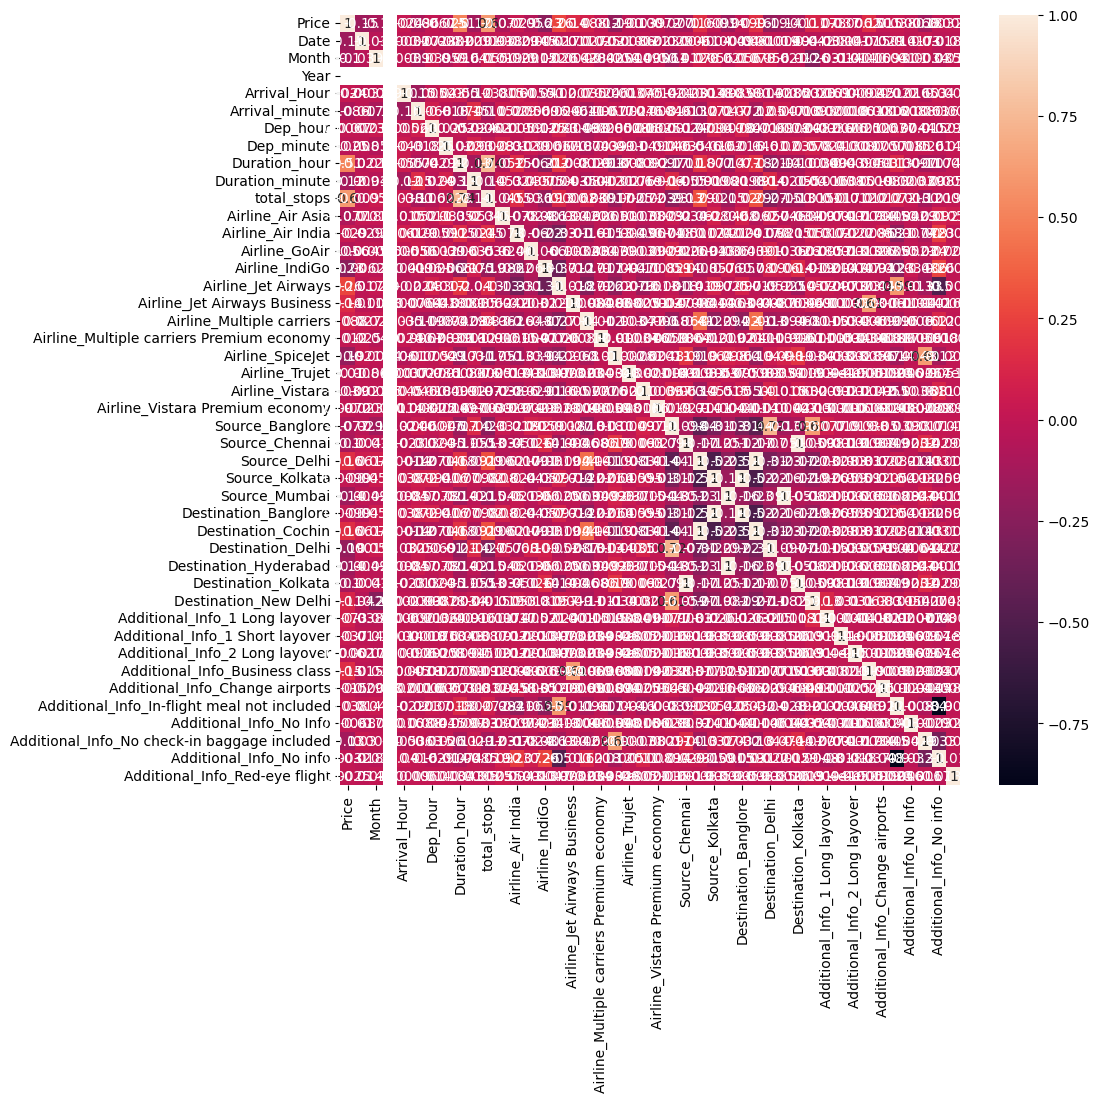

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(Flight_data.corr(),annot=True)

# Task
Perform exploratory data analysis (EDA) on the provided dataset to understand the relationships between features and the target variable (`Price`), identify potential outliers, and prepare the data for further analysis.

## Analyze the distribution of the target variable

Visualize the distribution of the `Price` column to understand its spread and identify potential outliers.


In summary, both charts indicate that the majority of flight prices are relatively low, but there are a considerable number of flights with significantly higher prices that are considered outliers. This suggests that the price distribution is not normal and that there are factors contributing to these higher prices, which could be explored further in the analysis.



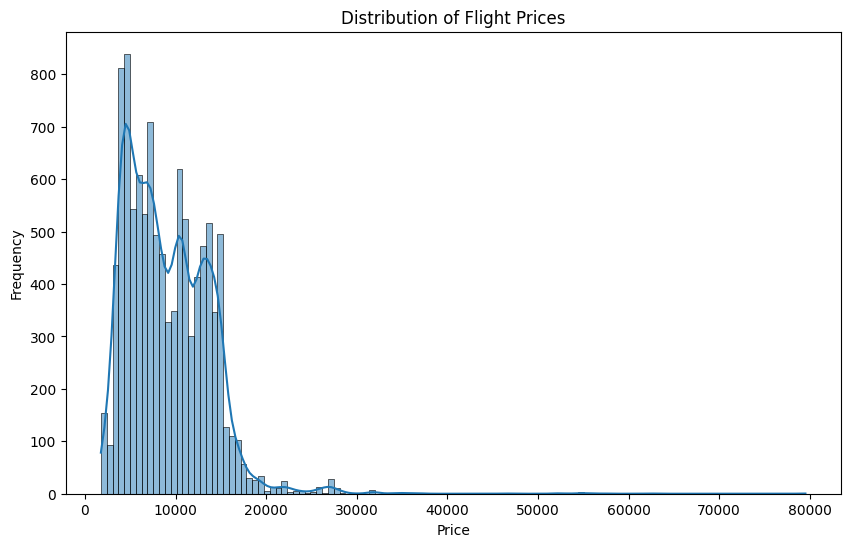

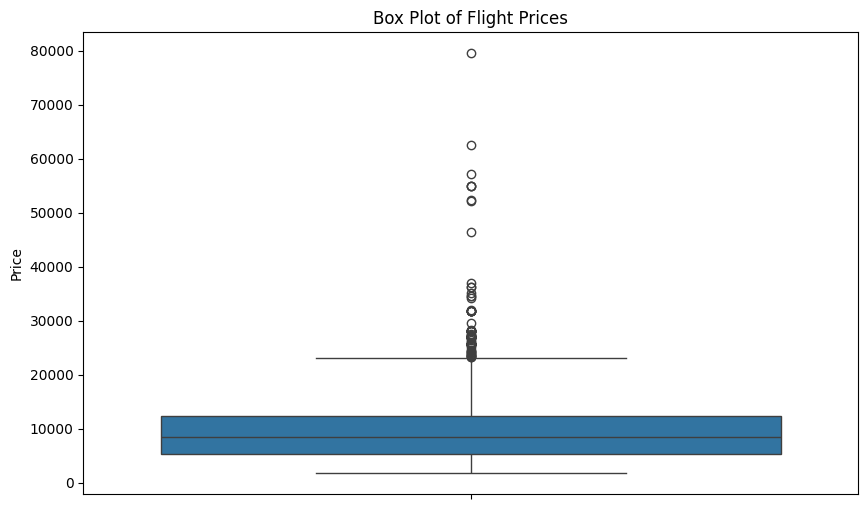

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(Flight_data['Price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=Flight_data['Price'])
plt.ylabel('Price')
plt.title('Box Plot of Flight Prices')
plt.show()

## Analyze the relationship between categorical features and the target variable

### Subtask:
Use visualizations like box plots or violin plots to see how categorical features like `Airline`, `Source`, `Destination`, and `Total_Stops` affect the `Price`.


**Reasoning**:
Create box plots to visualize the relationship between categorical features and the price.



The analysis indicates a clear relationship between the airline and the price of the flight, with the airline being a significant factor influencing the price distribution.



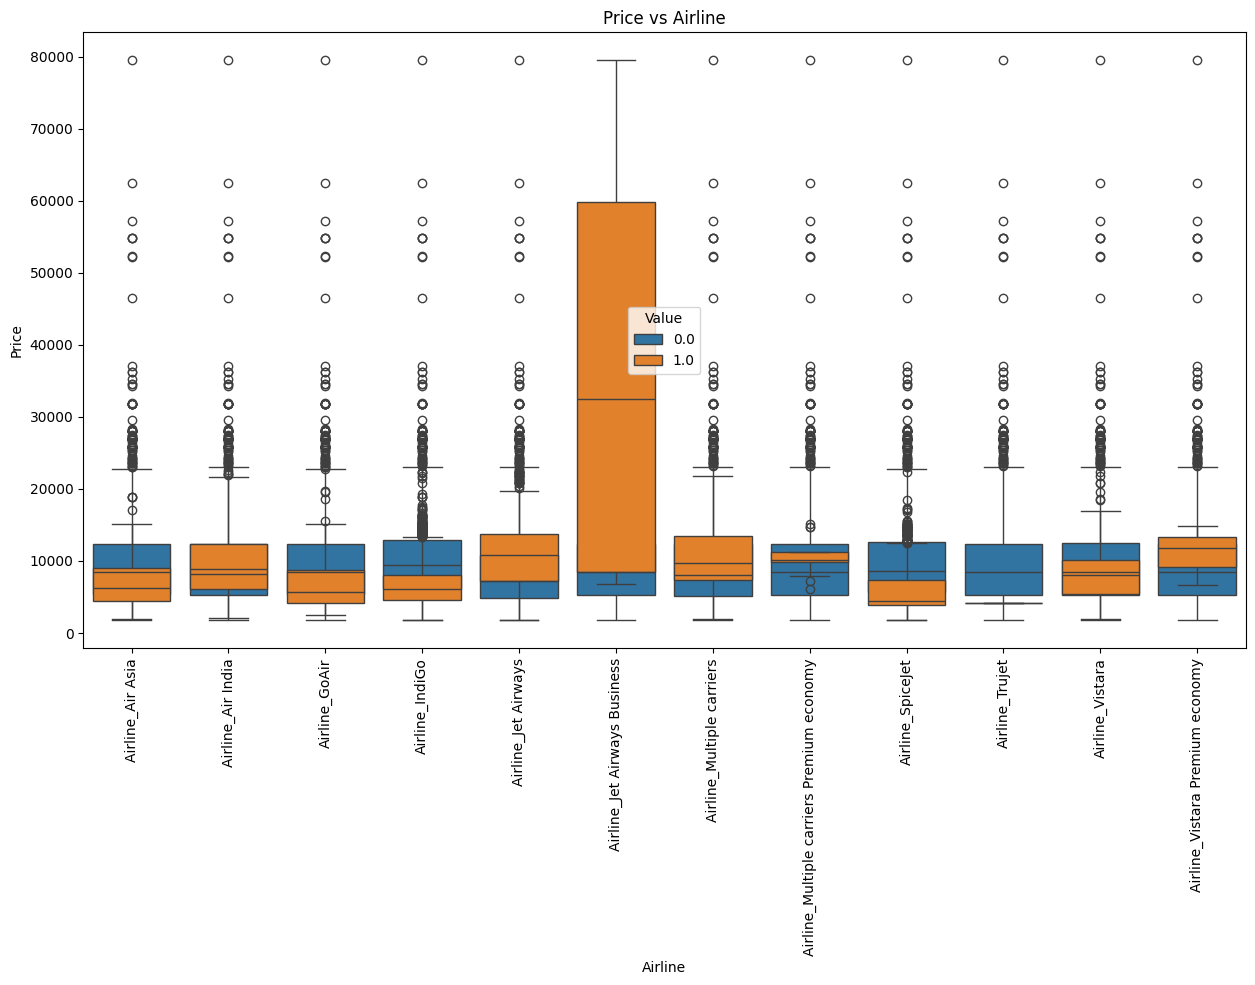

In [77]:
airline_cols = [col for col in Flight_data.columns if 'Airline_' in col]
plt.figure(figsize=(15, 8))
sns.boxplot(data=Flight_data[airline_cols + ['Price']].melt(id_vars='Price', var_name='Airline', value_name='Value'),
            x='Airline', y='Price', hue='Value', dodge=False)
plt.xticks(rotation=90)
plt.title('Price vs Airline')
plt.show()


I will now create box plots for the other categorical features using their one-hot encoded columns since the direct columns were dropped.



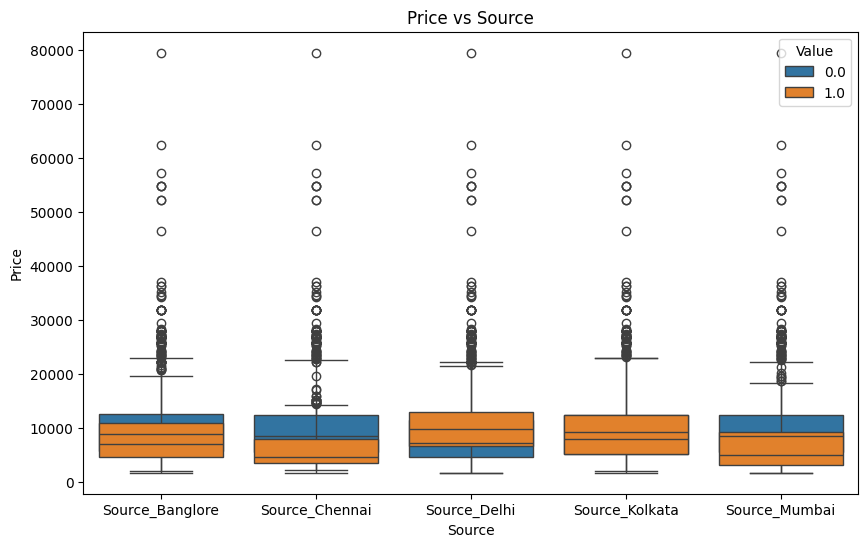

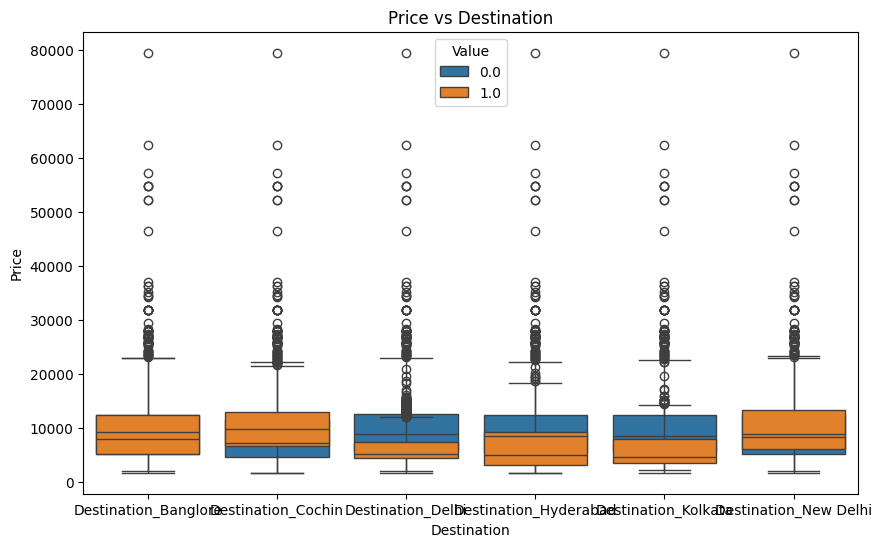

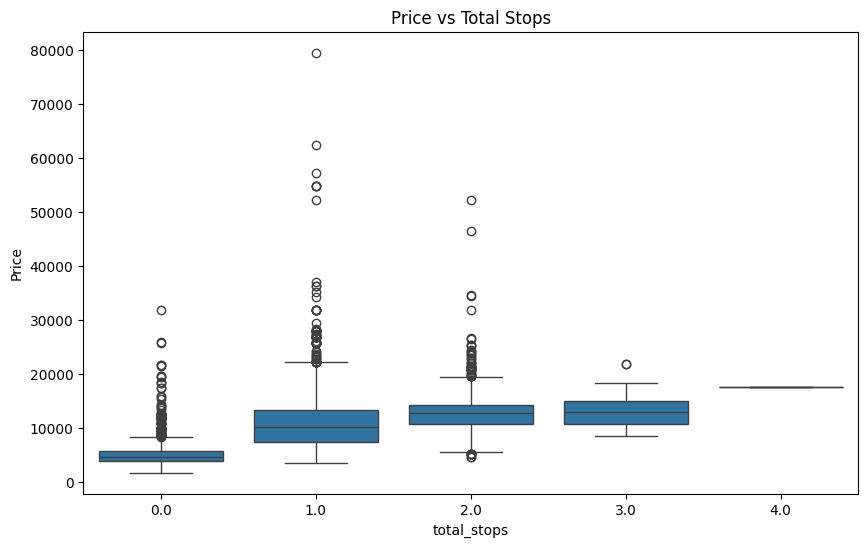

In [78]:
source_cols = [col for col in Flight_data.columns if 'Source_' in col]
plt.figure(figsize=(10, 6))
sns.boxplot(data=Flight_data[source_cols + ['Price']].melt(id_vars='Price', var_name='Source', value_name='Value'),
            x='Source', y='Price', hue='Value', dodge=False)
plt.title('Price vs Source')
plt.show()

destination_cols = [col for col in Flight_data.columns if 'Destination_' in col]
plt.figure(figsize=(10, 6))
sns.boxplot(data=Flight_data[destination_cols + ['Price']].melt(id_vars='Price', var_name='Destination', value_name='Value'),
            x='Destination', y='Price', hue='Value', dodge=False)
plt.title('Price vs Destination')
plt.show()

# total_stops is already numerical and was not one-hot encoded in the same way
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_stops', y='Price', data=Flight_data)
plt.title('Price vs Total Stops')
plt.show()

## Analyze the relationship between numerical features and the target variable

### Subtask:
Use scatter plots or other appropriate visualizations to explore the relationship between numerical features like `Date`, `Month`, `Year`, `Dep_hour`, `Dep_minute`, `Arrival_Hour`, `Arrival_minute`, `Duration_hour`, `Duration_minute`, and `Price`.


**Reasoning**:
Generate scatter plots for each numerical feature against 'Price' to visualize their relationships.



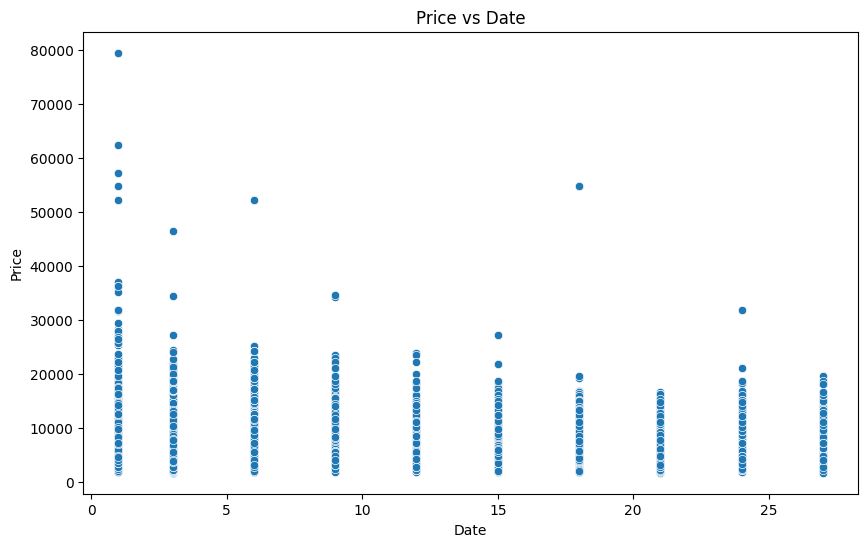

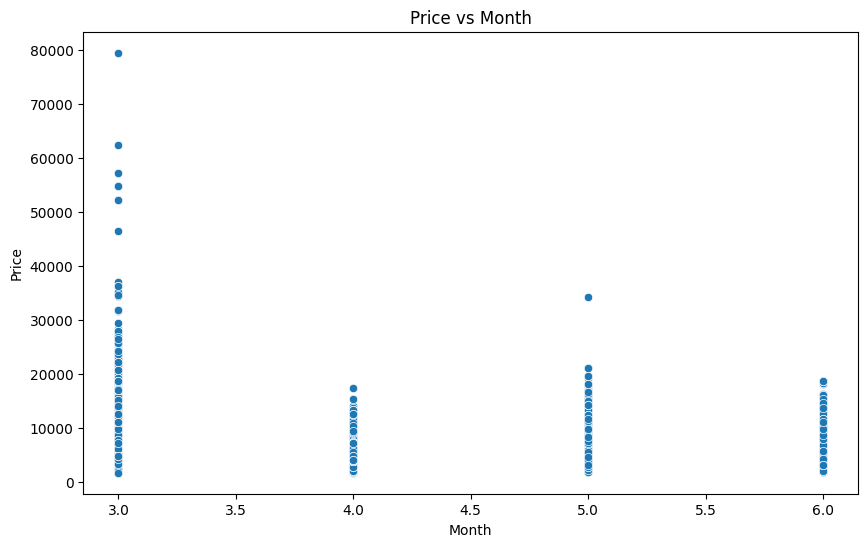

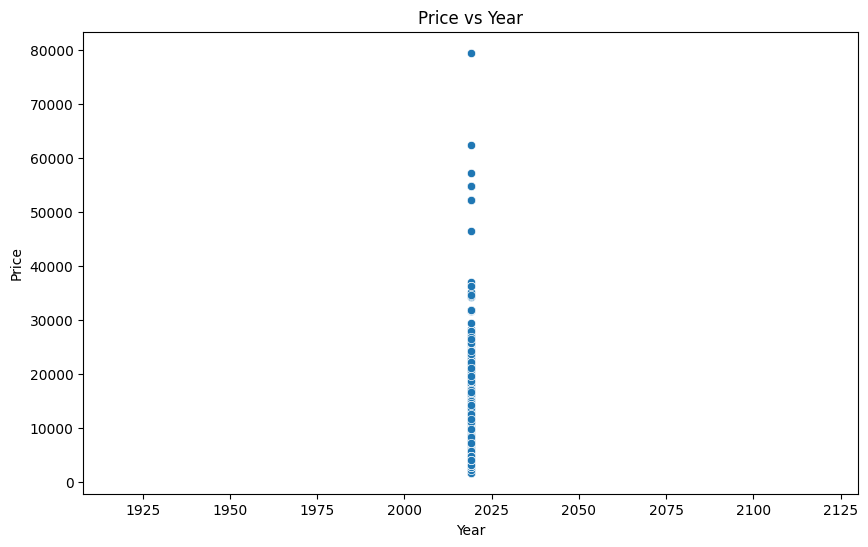

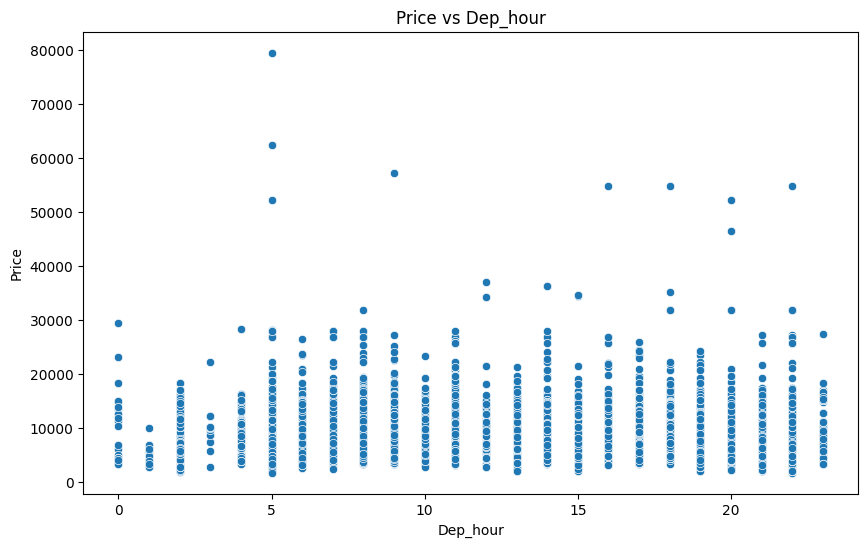

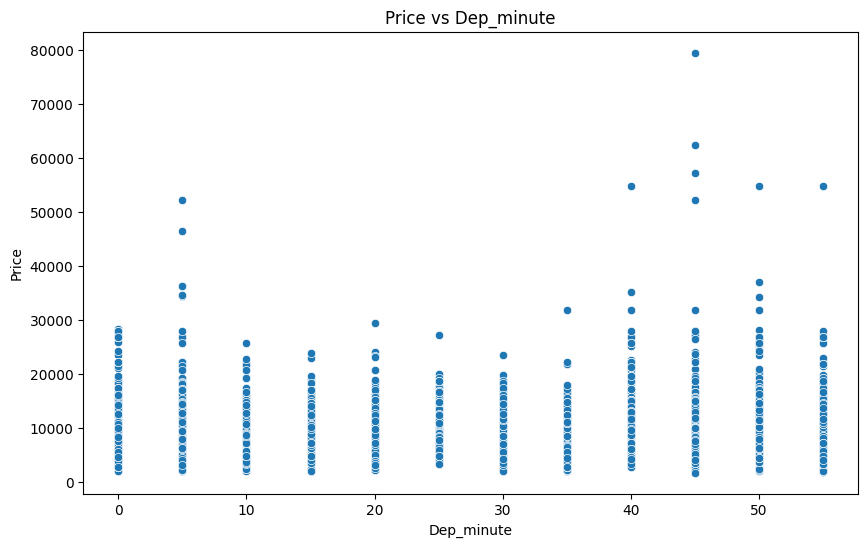

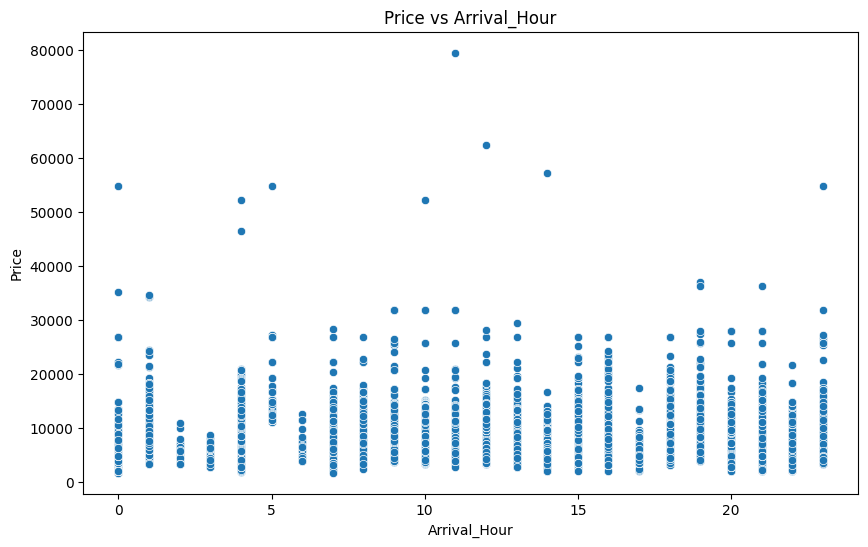

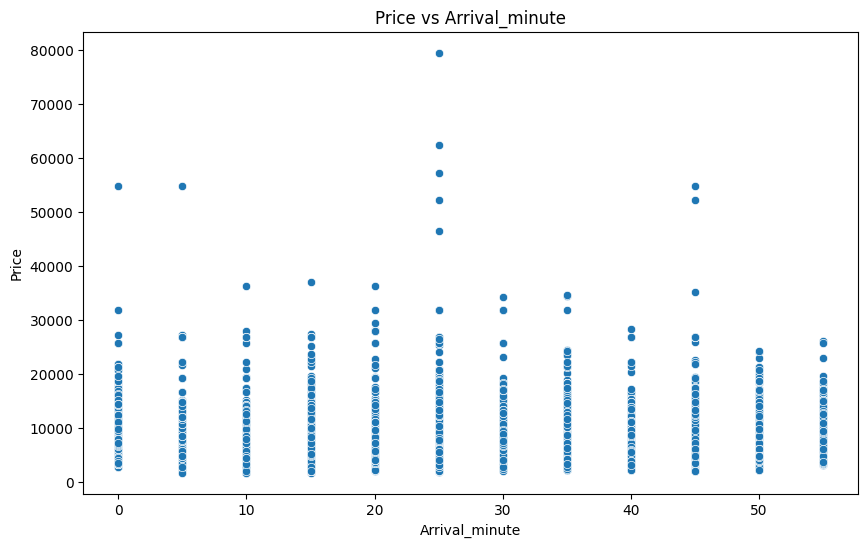

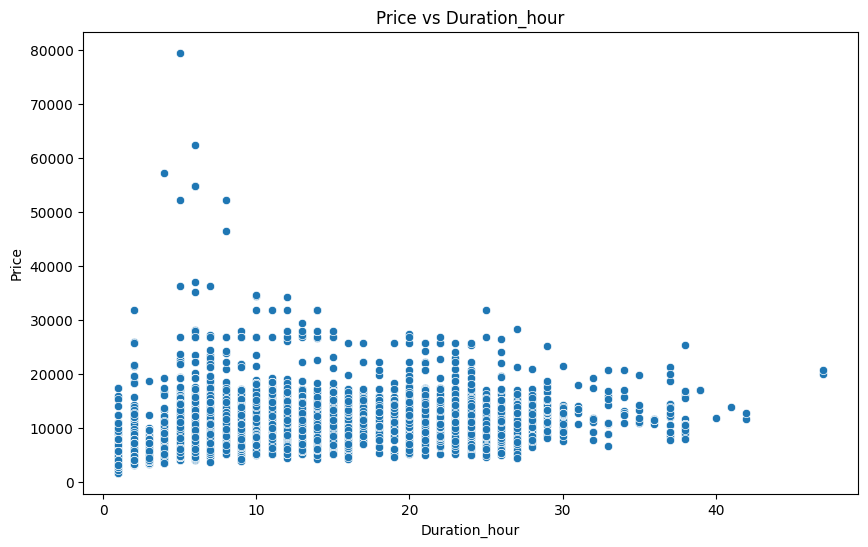

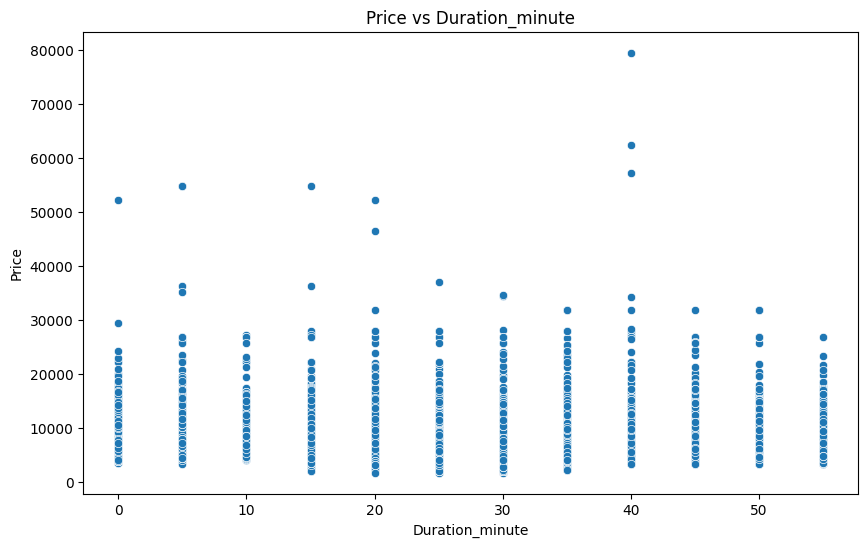

In [79]:
numerical_features = ['Date', 'Month', 'Year', 'Dep_hour', 'Dep_minute', 'Arrival_Hour', 'Arrival_minute', 'Duration_hour', 'Duration_minute']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Price', data=Flight_data)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')
    plt.show()

## Analyze the relationship between features

### Subtask:
Use visualizations like pair plots or correlation matrices to understand the relationships between different features.


**Reasoning**:
Calculate and visualize the correlation matrix for all numerical features in the DataFrame to understand their relationships, including with the target variable 'Price'. A heatmap is suitable for this purpose, and since there are many features after one-hot encoding, a large figure size is necessary for readability.



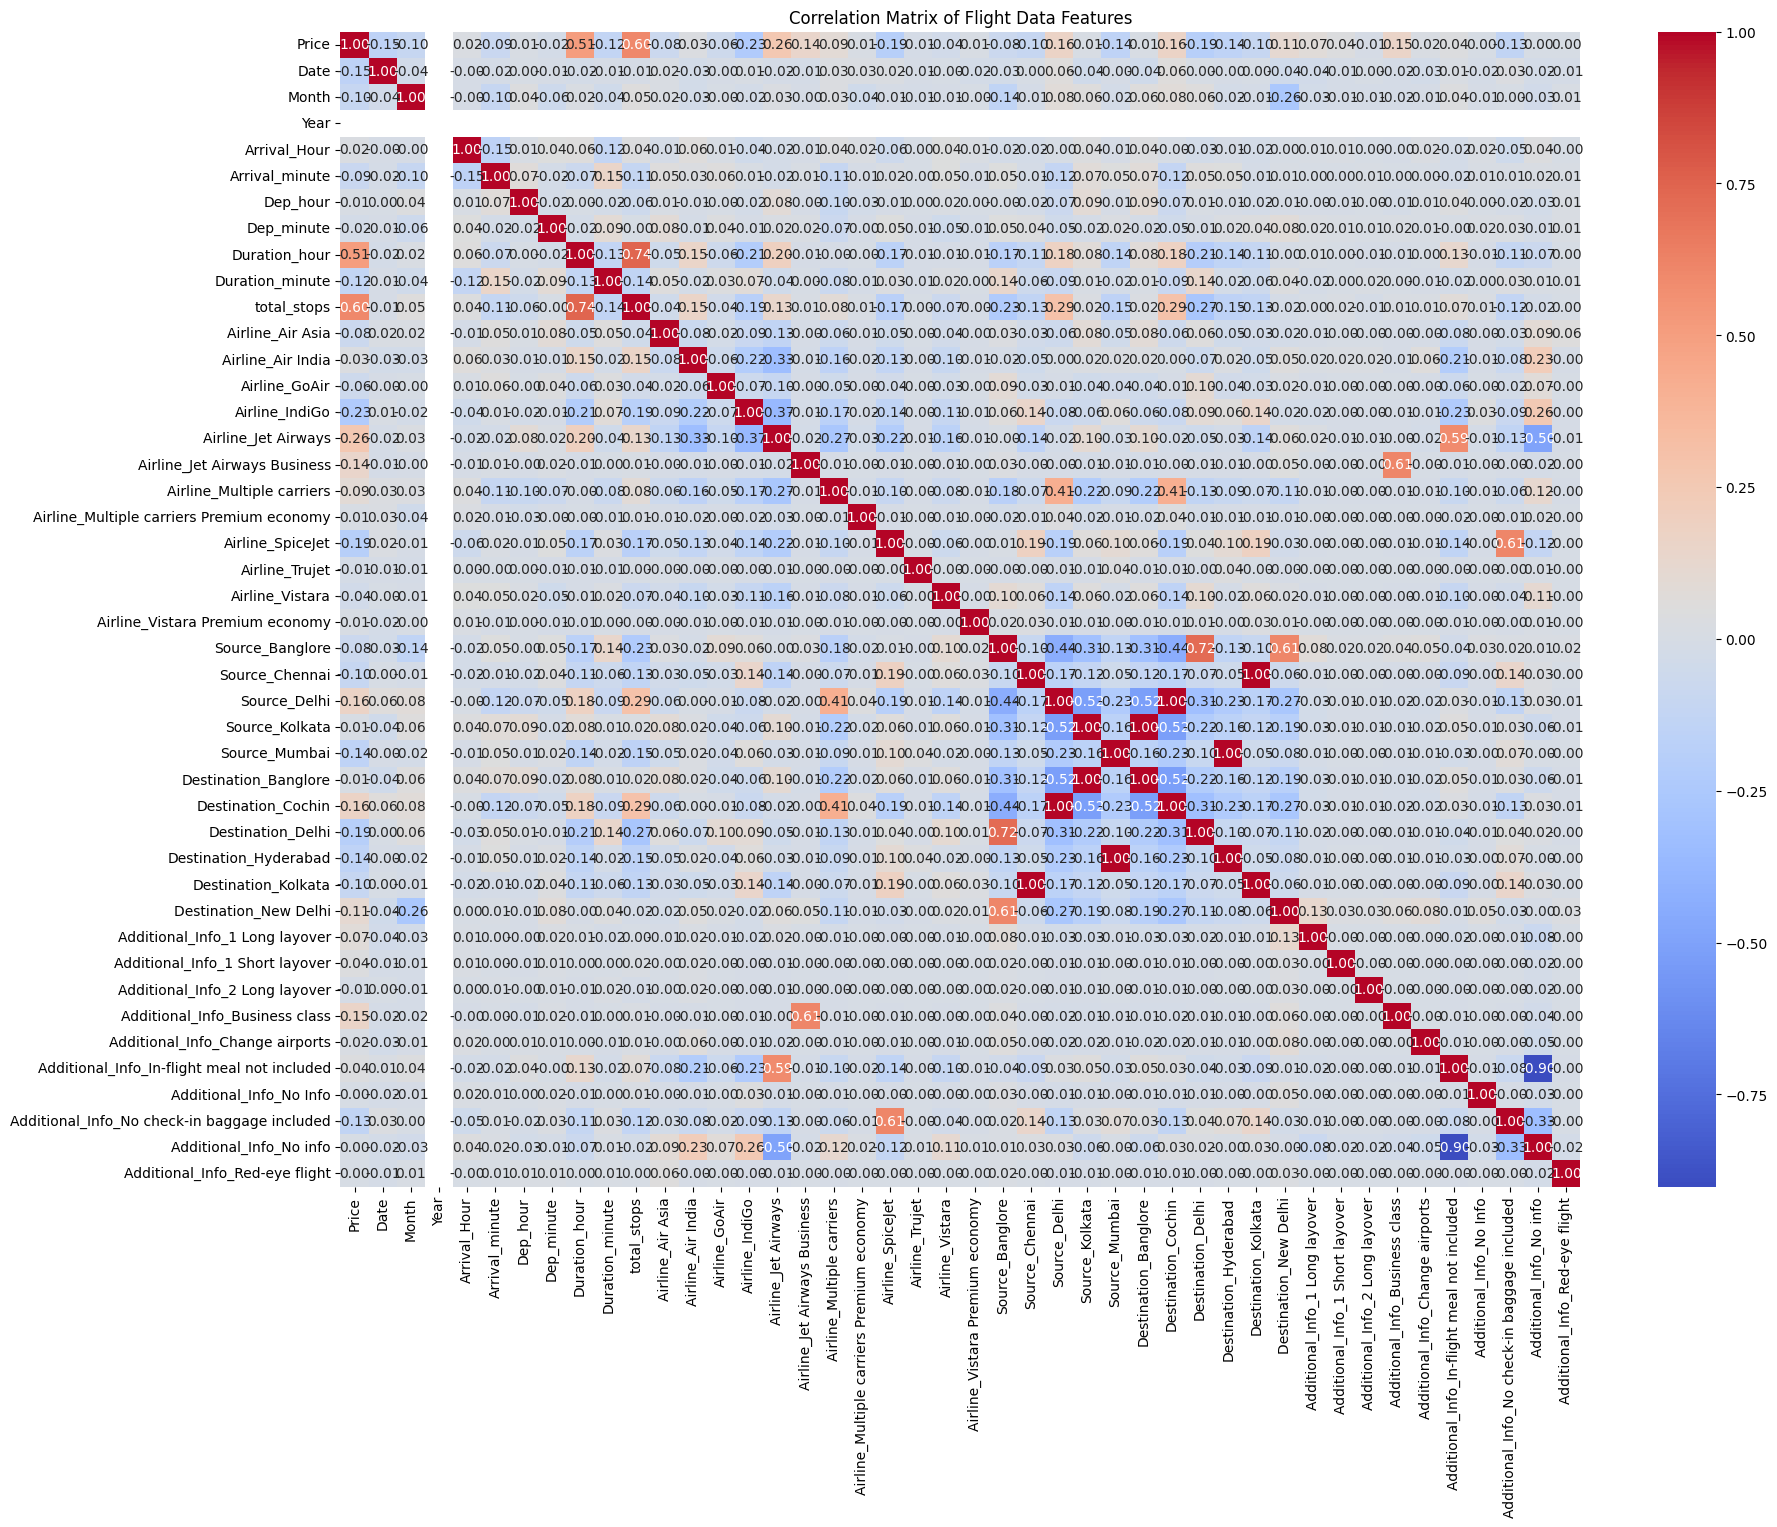

In [80]:
correlation_matrix = Flight_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Flight Data Features')
plt.show()

**Reasoning**:
The previous heatmap shows the correlation matrix of all numerical features, including the one-hot encoded columns. This fulfills the requirement to use correlation matrices to understand feature relationships. The heatmap is quite dense due to the number of features. Creating a pair plot for a subset of key numerical features, including 'Price', will provide a more detailed visualization of pairwise relationships and distributions for those selected features, addressing the alternative approach mentioned in the instructions.



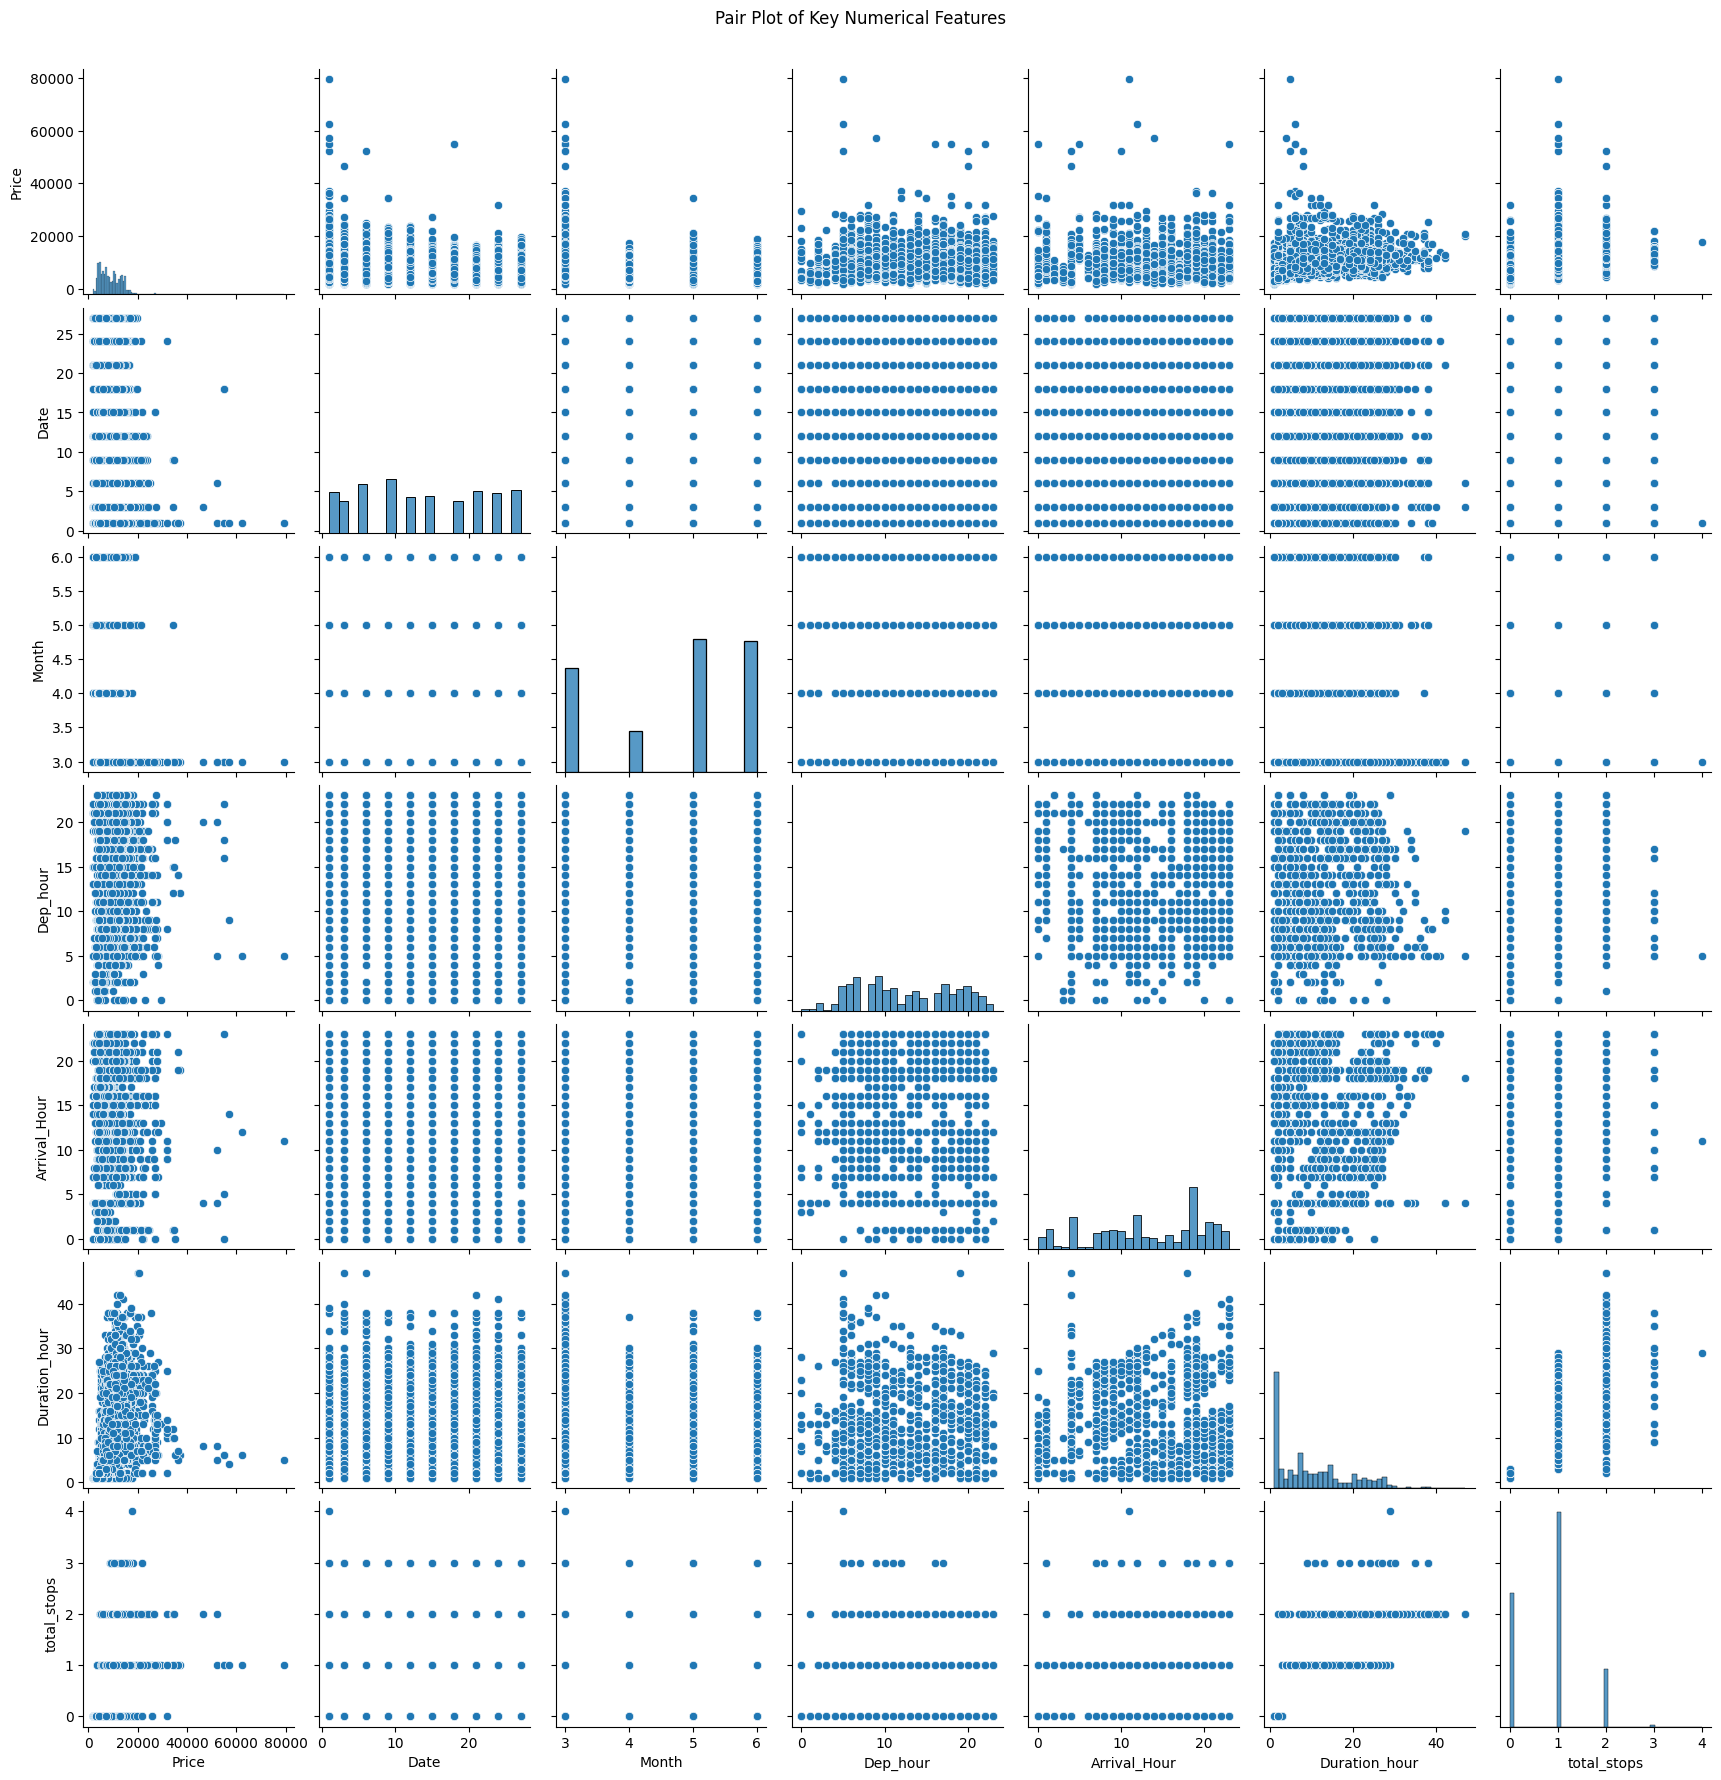

In [81]:
key_numerical_features = ['Price', 'Date', 'Month', 'Dep_hour', 'Arrival_Hour', 'Duration_hour', 'total_stops']
sns.pairplot(Flight_data[key_numerical_features])
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()

## Handle outliers

### Subtask:
Identify and handle outliers in the data, especially in the target variable.


**Reasoning**:
Calculate the IQR for the 'Price' column, define the upper and lower bounds for outlier detection, filter the DataFrame to remove outliers based on these bounds, and then print the number of rows removed and the method used.



In [82]:
Q1 = Flight_data['Price'].quantile(0.25)
Q3 = Flight_data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

initial_rows = Flight_data.shape[0]
Flight_data_cleaned = Flight_data[(Flight_data['Price'] >= lower_bound) & (Flight_data['Price'] <= upper_bound)].copy()
rows_removed = initial_rows - Flight_data_cleaned.shape[0]

print(f"Outliers handled using the IQR method with a multiplier of 1.5.")
print(f"Number of rows removed: {rows_removed}")

Outliers handled using the IQR method with a multiplier of 1.5.
Number of rows removed: 95


## Summary:

### Data Analysis Key Findings

*   The distribution of flight prices is right-skewed, with a significant number of outliers on the higher end, as shown by the histogram and box plot of the `Price` column.
*   The original categorical columns (`Airline`, `Source`, `Destination`) were one-hot encoded in the dataset.
*   Box plots indicated that different airlines, sources, and destinations have varying price distributions. The `total_stops` feature also shows a relationship with price, with more stops generally correlating with higher prices, although the box plot for `total_stops` needs further detailed analysis to confirm this.
*   Scatter plots between `Price` and numerical features (`Date`, `Month`, `Year`, `Dep_hour`, `Dep_minute`, `Arrival_Hour`, `Arrival_minute`, `Duration_hour`, and `Duration_minute`) did not reveal strong linear correlations, suggesting potential non-linear relationships or that price is influenced by combinations of these features or specific time intervals.
*   The correlation matrix heatmap provided a comprehensive view of linear relationships between all features, including the one-hot encoded variables and `Price`.
*   A pair plot of key numerical features (Price, Date, Month, Dep\_hour, Arrival\_Hour, Duration\_hour, total\_stops) offered a more detailed visual inspection of pairwise relationships and individual feature distributions.
*   Using the IQR method with a multiplier of 1.5, 95 rows containing outliers in the `Price` column were identified and removed from the dataset.

### Insights or Next Steps

*   Given the non-linear relationships observed with some numerical features and the influence of categorical variables, consider exploring non-linear regression models or tree-based models for price prediction.
*   Further investigate the relationship between `Price` and time-based features by analyzing price patterns during specific hours of the day, days of the week, or months, which might reveal stronger correlations or dependencies.
